In [1]:
import os
import shutil
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from random import sample
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
imag_3_hojas = 0
imag_4_hojas = 0
imag_5_6_hojas = 0
imag_7plus_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1_mod"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2_mod"
dir3 = "C:/Users/ferga/Documents/Python/hojas/3_mod"
dir4 = "C:/Users/ferga/Documents/Python/hojas/4_mod"
dir5 = "C:/Users/ferga/Documents/Python/hojas/5_6_mod"
dir6 = "C:/Users/ferga/Documents/Python/hojas/7+_mod"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
for path in os.listdir(dir3):
    if os.path.isfile(os.path.join(dir3, path)):
        imag_3_hojas += 1
for path in os.listdir(dir4):
    if os.path.isfile(os.path.join(dir4, path)):
        imag_4_hojas += 1
for path in os.listdir(dir5):
    if os.path.isfile(os.path.join(dir5, path)):
        imag_5_6_hojas += 1
for path in os.listdir(dir6):
    if os.path.isfile(os.path.join(dir6, path)):
        imag_7plus_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Imagenes de 3 hojas: '+ str(imag_3_hojas))
print('Imagenes de 4 hojas: '+ str(imag_4_hojas))
print('Imagenes de 5 o 6 hojas: '+ str(imag_5_6_hojas))
print('Imagenes de 7 o mas hojas: '+ str(imag_7plus_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas+imag_3_hojas+imag_4_hojas+imag_5_6_hojas+imag_7plus_hojas)


Imagenes de 1 hoja: 1234
Imagenes de 2 hojas: 1234
Imagenes de 3 hojas: 1230
Imagenes de 4 hojas: 1234
Imagenes de 5 o 6 hojas: 1938
Imagenes de 7 o mas hojas: 1352
Total:  8222


In [4]:
imag_5_6_hojas = 1300

In [5]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))
n_imag_train_3 = round(imag_3_hojas*0.8)
n_imag_validation_3 = imag_3_hojas//10
n_imag_test_3 = imag_3_hojas-n_imag_train_3-n_imag_validation_3
print('3 hojas: Train=' + str(n_imag_train_3) + ' Validation=' + str(n_imag_validation_3) + ' Test=' + str(n_imag_test_3))
n_imag_train_4 = round(imag_4_hojas*0.8)
n_imag_validation_4 = imag_4_hojas//10
n_imag_test_4 = imag_4_hojas-n_imag_train_4-n_imag_validation_4
print('4 hojas: Train=' + str(n_imag_train_4) + ' Validation=' + str(n_imag_validation_4) + ' Test=' + str(n_imag_test_4))
n_imag_train_5 = round(imag_5_6_hojas*0.8)
n_imag_validation_5 = imag_5_6_hojas//10
n_imag_test_5 = imag_5_6_hojas-n_imag_train_5-n_imag_validation_5
print('5 o 6 hojas: Train=' + str(n_imag_train_5) + ' Validation=' + str(n_imag_validation_5) + ' Test=' + str(n_imag_test_5))
n_imag_train_6 = round(imag_7plus_hojas*0.8)
n_imag_validation_6 = imag_7plus_hojas//10
n_imag_test_6 = imag_7plus_hojas-n_imag_train_6-n_imag_validation_6
print('7 o mas hojas: Train=' + str(n_imag_train_6) + ' Validation=' + str(n_imag_validation_6) + ' Test=' + str(n_imag_test_6))

1 hoja: Train=987 Validation=123 Test=124
2 hojas: Train=987 Validation=123 Test=124
3 hojas: Train=984 Validation=123 Test=123
4 hojas: Train=987 Validation=123 Test=124
5 o 6 hojas: Train=1040 Validation=130 Test=130
7 o mas hojas: Train=1082 Validation=135 Test=135


In [6]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')
# 3 hojas.
train_weed3_dir = os.path.join(train_dir, '3')
# 4 hojas.
train_weed4_dir = os.path.join(train_dir, '4')
# 5 o 6 hojas.
train_weed5_dir = os.path.join(train_dir, '5_6')
# 7 o mas hojas.
train_weed6_dir = os.path.join(train_dir, '7+')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')
# 3 hojas
validation_weed3_dir = os.path.join(validation_dir, '3')
# 4 hojas
validation_weed4_dir = os.path.join(validation_dir, '4')
# 5 o 6 hojas
validation_weed5_dir = os.path.join(validation_dir, '5_6')
# 7 o mas hojas
validation_weed6_dir = os.path.join(validation_dir, '7+')

## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')
# 3 hojas
test_weed3_dir = os.path.join(test_dir,'3')
# 4 hojas
test_weed4_dir = os.path.join(test_dir,'4')
# 5 o 6 hojas
test_weed5_dir = os.path.join(test_dir,'5_6')
# 7 o mas hojas
test_weed6_dir = os.path.join(test_dir,'7+')

In [7]:
# Ordena las imágenes de cada categoría en el directorio de train, validation y test.

# 1 hoja
contenido_1 = os.listdir(dir1)
contenido_1_random = sample(contenido_1, len(contenido_1))
for i in range(len(contenido_1_random)):
    if i < n_imag_train_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), train_weed1_dir)
    elif i >= n_imag_train_1 and i < n_imag_train_1+n_imag_validation_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), validation_weed1_dir)
    else:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), test_weed1_dir)
# 2 hojas
contenido_2 = os.listdir(dir2)
contenido_2_random = sample(contenido_2, len(contenido_2))
for i in range(len(contenido_2_random)):
    if i < n_imag_train_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), train_weed2_dir)
    elif i >= n_imag_train_2 and i < n_imag_train_2+n_imag_validation_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), validation_weed2_dir)
    else:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), test_weed2_dir)
# 3 hojas
contenido_3 = os.listdir(dir3)
contenido_3_random = sample(contenido_3, len(contenido_3))
for i in range(len(contenido_3_random)):
    if i < n_imag_train_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), train_weed3_dir)
    elif i >= n_imag_train_3 and i < n_imag_train_3+n_imag_validation_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), validation_weed3_dir)
    else:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), test_weed3_dir)
# 4 hojas
contenido_4 = os.listdir(dir4)
contenido_4_random = sample(contenido_4, len(contenido_4))
for i in range(len(contenido_4_random)):
    if i < n_imag_train_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), train_weed4_dir)
    elif i >= n_imag_train_4 and i < n_imag_train_4+n_imag_validation_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), validation_weed4_dir)
    else:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), test_weed4_dir)
# 5 o 6 hojas
contenido_5 = os.listdir(dir5)
contenido_5_random = sample(contenido_5, len(contenido_5))
for i in range(len(contenido_5_random)):
    if i < n_imag_train_5:
        shutil.copy(os.path.join(dir5, contenido_5_random[i]), train_weed5_dir)
    elif i >= n_imag_train_5 and i < n_imag_train_5+n_imag_validation_5:
        shutil.copy(os.path.join(dir5, contenido_5_random[i]), validation_weed5_dir)
    else:
        shutil.copy(os.path.join(dir5, contenido_5_random[i]), test_weed5_dir)
# 7 o mas hojas
contenido_6 = os.listdir(dir6)
contenido_6_random = sample(contenido_6, len(contenido_6))
for i in range(len(contenido_6_random)):
    if i < n_imag_train_6:
        shutil.copy(os.path.join(dir6, contenido_6_random[i]), train_weed6_dir)
    elif i >= n_imag_train_6 and i < n_imag_train_6+n_imag_validation_6:
        shutil.copy(os.path.join(dir6, contenido_6_random[i]), validation_weed6_dir)
    else:
        shutil.copy(os.path.join(dir6, contenido_6_random[i]), test_weed6_dir)

In [7]:
# Pequeña comprobación de que las fotos están bien ordenadas

# Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])
train_weed3_fnames = os.listdir( train_weed3_dir )
print(train_weed3_fnames[:5])
train_weed4_fnames = os.listdir( train_weed4_dir )
print(train_weed4_fnames[:5])
train_weed5_fnames = os.listdir( train_weed5_dir )
print(train_weed5_fnames[:5])
train_weed6_fnames = os.listdir( train_weed6_dir )
print(train_weed6_fnames[:5])


['10.png', '100.png', '1005.png', '1006.png', '1007.png']
['1.png', '10.png', '102.png', '105.png', '106.png']
['1.png', '10.png', '100.png', '1001.png', '1002.png']
['1.png', '10.png', '1002.png', '1005.png', '1009.png']
['1.png', '1002.png', '1003.png', '1004.png', '1006.png']
['1.png', '1000.png', '1003.png', '1004.png', '1012.png']


In [10]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))
print('total training weed3 images :', len(os.listdir(train_weed3_dir ) ))
print('total training weed4 images :', len(os.listdir(train_weed4_dir ) ))
print('total training weed5 images :', len(os.listdir(train_weed5_dir ) ))
print('total training weed6 images :', len(os.listdir(train_weed6_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))
print('total validation weed3 images :', len(os.listdir( validation_weed3_dir ) ))
print('total validation weed4 images :', len(os.listdir( validation_weed4_dir ) ))
print('total validation weed5 images :', len(os.listdir( validation_weed5_dir ) ))
print('total validation weed6 images :', len(os.listdir( validation_weed6_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))
print('total test weed3 images :', len(os.listdir( test_weed3_dir ) ))
print('total test weed4 images :', len(os.listdir( test_weed4_dir ) ))
print('total test weed5 images :', len(os.listdir( test_weed5_dir ) ))
print('total test weed6 images :', len(os.listdir( test_weed6_dir ) ))

total training weed1 images : 987
total training weed2 images : 987
total training weed3 images : 984
total training weed4 images : 987
total training weed5 images : 1040
total training weed6 images : 1082
total validation weed1 images : 123
total validation weed2 images : 123
total validation weed3 images : 123
total validation weed4 images : 123
total validation weed5 images : 130
total validation weed6 images : 135
total test weed1 images : 124
total test weed2 images : 124
total test weed3 images : 123
total test weed4 images : 124
total test weed5 images : 228
total test weed6 images : 135


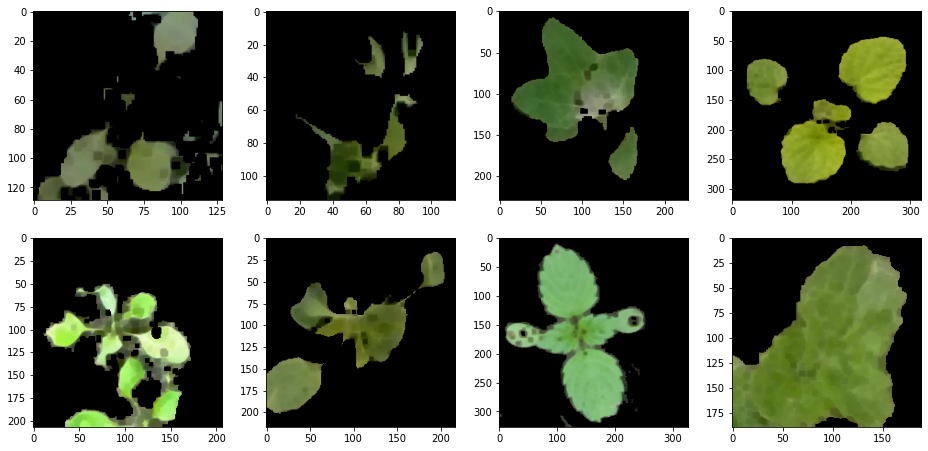

In [10]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed5_dir, fname) 
                for fname in train_weed5_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [12]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      fill_mode='nearest'
      )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [14]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         shuffle=False,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 6067 images belonging to 6 classes.
Found 757 images belonging to 6 classes.
Found 858 images belonging to 6 classes.


In [17]:
batch_size = 32
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

189
23


In [18]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=150,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/150
189/189 [==============================] - 41s 201ms/step - loss: 1.7862 - accuracy: 0.1991 - val_loss: 1.7762 - val_accuracy: 0.2609
Epoch 2/150
189/189 [==============================] - 30s 157ms/step - loss: 1.7727 - accuracy: 0.2535 - val_loss: 1.7537 - val_accuracy: 0.3217
Epoch 3/150
189/189 [==============================] - 26s 139ms/step - loss: 1.7485 - accuracy: 0.2840 - val_loss: 1.7014 - val_accuracy: 0.3587
Epoch 4/150
189/189 [==============================] - 26s 135ms/step - loss: 1.6764 - accuracy: 0.3289 - val_loss: 1.5870 - val_accuracy: 0.3652
Epoch 5/150
189/189 [==============================] - 28s 146ms/step - loss: 1.6004 - accuracy: 0.3478 - val_loss: 1.5541 - val_accuracy: 0.3870
Epoch 6/150
189/189 [==============================] - 25s 134ms/step - loss: 1.5450 - accuracy: 0.3634 - val_loss: 1.4330 - val_accuracy: 0.4239
Epoch 7/150
189/189 [==============================] - 25s 132ms/step - loss: 1.4745 - accuracy: 0.3998 - val_loss: 1.3487 -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

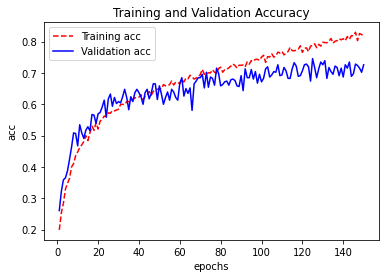

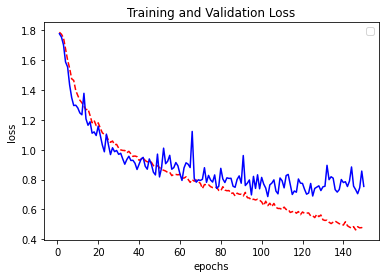

<Figure size 432x288 with 0 Axes>

In [19]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [15]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

43/43 [==============================] - 20s 157ms/step - loss: 0.9201 - accuracy: 0.6853
Test Accuracy: 0.6853147149085999


In [21]:
# Guardar el modelo
model.save('CH_V_6hojas_cv.h5')

In [11]:
# Cargar modelo
model = tf.keras.models.load_model('CH_V_6hojas_cv.h5')

In [ ]:
# predicting images

path='hojas/test/1/829.png'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes[0])
  
plt.imshow(img)  
plt.show()

if classes[0,0] == 1:
    print("1 hoja")
if classes[0,1] == 1:
    print("2 hojas")